In [1]:
import os
from Bio import Phylo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# rep2

In [2]:
files = [file for file in os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3026_ML_per_TimePoint/') if file.endswith('treefile')]

depths_df = pd.DataFrame()
for file in files:
    clone_size = file.split('-')[2].strip('.phy.treefile')
    #if int(clone_size) < 100:
    #    continue
    tree = Phylo.read('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3026_ML_per_TimePoint/'+file, format='newick')
    for i in tree.get_nonterminals():
        i.branch_length = 1
    for i in tree.get_terminals():
        i.branch_length = 1
    df = pd.DataFrame([tree.distance(leaf) for leaf in [leaf.name for leaf in tree.get_terminals()] if leaf != 'synthetic'],columns=['tree_depth'])
    df['lineageGrp'] = file.split('-')[1]
    df['time'] = file.split('_')[0]
    df['mouse'] = 'rep2'
    depths_df = pd.concat([depths_df,df],axis=0)
    

# rep1

In [3]:
files = [file for file in os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3028_ML_per_TimePoint/') if file.endswith('treefile')]

for file in files:
    tree = Phylo.read('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3028_ML_per_TimePoint/'+file, format='newick')
    for i in tree.get_nonterminals():
        i.branch_length = 1
    for i in tree.get_terminals():
        i.branch_length = 1
    df = pd.DataFrame([tree.distance(leaf) for leaf in [leaf.name for leaf in tree.get_terminals()] if leaf != 'synthetic'],columns=['tree_depth'])
    df['lineageGrp'] = file.split('-')[1]
    df['time'] = file.split('_')[0]
    df['mouse'] = 'rep1'
    depths_df = pd.concat([depths_df,df],axis=0)
    

# rep3

In [4]:
files = [file for file in os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3030_ML_per_TimePoint/') if file.endswith('treefile')]

for file in files:
    tree = Phylo.read('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3030_ML_per_TimePoint/'+file, format='newick')
    for i in tree.get_nonterminals():
        i.branch_length = 1
    for i in tree.get_terminals():
        i.branch_length = 1
    df = pd.DataFrame([tree.distance(leaf) for leaf in [leaf.name for leaf in tree.get_terminals()] if leaf != 'synthetic'],columns=['tree_depth'])
    df['lineageGrp'] = file.split('-')[1]
    df['time'] = file.split('_')[0]
    df['mouse'] = 'rep3'
    depths_df = pd.concat([depths_df,df],axis=0)
    

In [5]:
depths_df = depths_df[depths_df['time']=='T3']

In [6]:
depths_df['mouse'] = pd.Categorical(depths_df['mouse'], categories=['rep1','rep2','rep3'], ordered=True)

In [7]:
depths_df

,tree_depth,lineageGrp,time,mouse
0,6,34,T3,rep2
1,9,34,T3,rep2
2,9,34,T3,rep2
3,8,34,T3,rep2
4,7,34,T3,rep2
...,...,...,...,...
47,4,27,T3,rep3
48,3,27,T3,rep3
49,2,27,T3,rep3
50,2,27,T3,rep3


Text(0, 0.5, 'tree depth of clone cells')

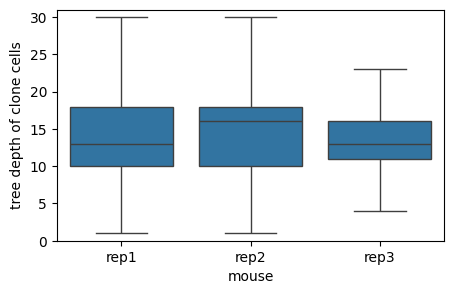

In [14]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 3) 
sns.boxplot(depths_df,x='mouse',y='tree_depth',showfliers=False)
plt.ylim(0,31)
plt.ylabel('tree depth of clone cells')

In [10]:
np.median(depths_df.loc[depths_df['mouse']=='rep1']['tree_depth'])

13.0

In [11]:
np.median(depths_df.loc[depths_df['mouse']=='rep2']['tree_depth'])

16.0

In [12]:
np.median(depths_df.loc[depths_df['mouse']=='rep3']['tree_depth'])

13.0